In [1]:
!pip install dlib

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
import cv2

import warnings
warnings.filterwarnings('ignore')

In [29]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
image1 = cv2.imread("/content/drive/MyDrive/group.jpg")

In [27]:
!pip install mtcnn

In [28]:
from mtcnn import MTCNN

8/8 [==============================] - 0s 23ms/step


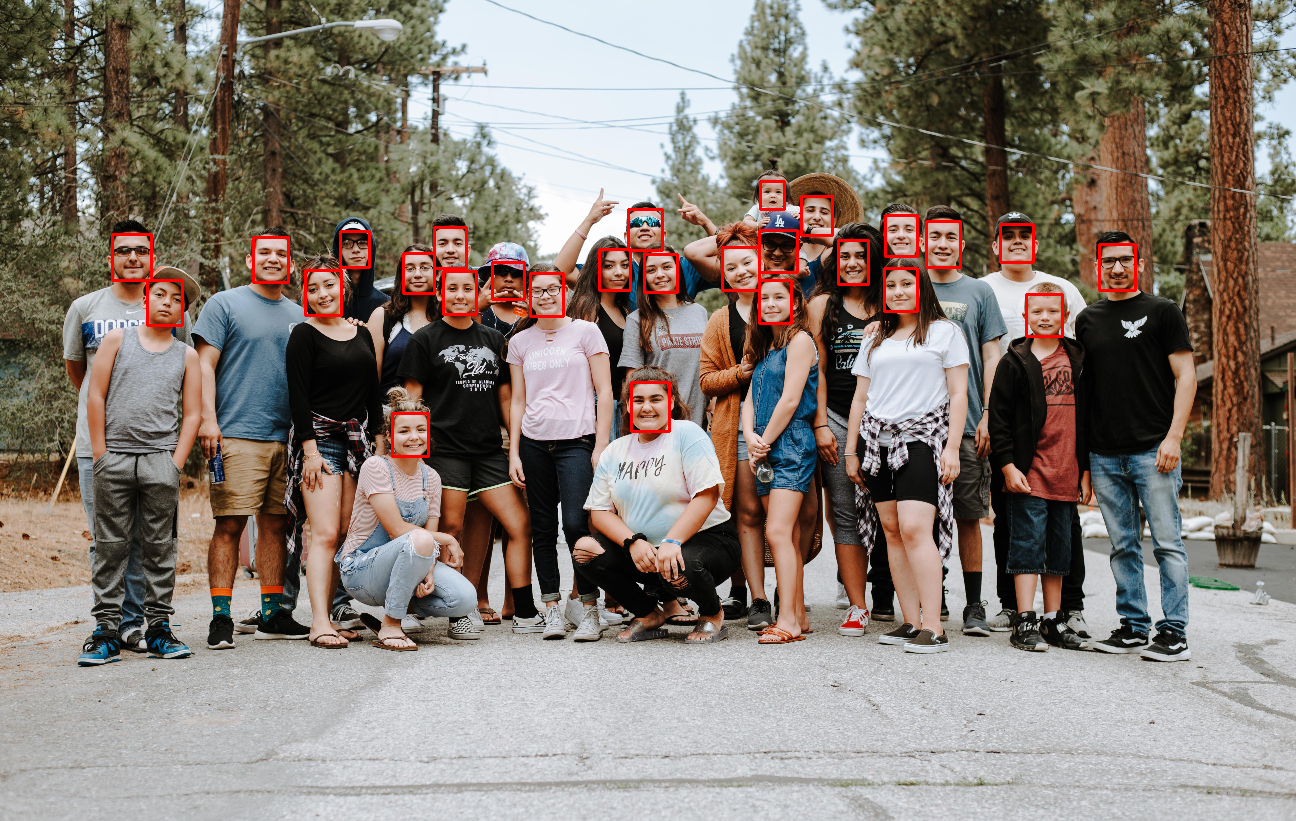

In [7]:
detector = MTCNN()

## RGB image
image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# detect faces
detections = detector.detect_faces(image)

# draw all faces
for face in detections:
    x,y,w,h = face['box']
    image = cv2.rectangle(image, (x,y), (x+w, y+h), (255,0,0), 2)

# show image
Image.fromarray(image)

In [10]:
!git clone https://github.com/hromi/SMILEsmileD.git

fatal: destination path 'SMILEsmileD' already exists and is not an empty directory.


In [11]:
from glob import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

In [12]:
path = "./SMILEsmileD/SMILEs/*/*/*.jpg"

images_paths = glob(path)

len(images_paths)

13165

In [13]:
images = []
labels = []

for path in images_paths:

    img = load_img(path, color_mode='grayscale', target_size=(64,64))
    img = img_to_array(img)
    images.append(img)

    label = path.split('/')[-3]

    if 'positives'==label:
        labels.append(1)
    else:
        labels.append(0)


images = np.array(images)
labels = np.array(labels)

In [14]:
images.shape, labels.shape

((13165, 64, 64, 1), (13165,))

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(images, labels,
                                                    test_size=0.1,
                                                    random_state=10,
                                                    stratify=labels)

In [17]:
height = 64
width = 64
depth =1
classes=2

input_shape = (width,height,depth)

In [18]:
import numpy as np
import os
import argparse
import cv2
from imutils import paths
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Layer,Conv2D,Activation,MaxPool2D,Dense,Flatten,Dropout
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [19]:
sgd = SGD(lr=0.01)
model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 62, 62, 64)        640       
                                                                 
 activation (Activation)     (None, 62, 62, 64)        0         
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 31, 31, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_37 (Conv2D)          (None, 29, 29, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 29, 29, 64)        0         
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                  

In [20]:
y_train.shape

(11848,)

In [21]:
H = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=32)

Epoch 1/50
371/371 [==============================] - 8s 9ms/step - loss: 0.6140 - accuracy: 0.8306 - val_loss: 0.2943 - val_accuracy: 0.8762
Epoch 2/50
371/371 [==============================] - 3s 8ms/step - loss: 0.2753 - accuracy: 0.8996 - val_loss: 0.2546 - val_accuracy: 0.8983
Epoch 3/50
371/371 [==============================] - 3s 9ms/step - loss: 0.2461 - accuracy: 0.9085 - val_loss: 0.2527 - val_accuracy: 0.8937
Epoch 4/50
371/371 [==============================] - 3s 9ms/step - loss: 0.2299 - accuracy: 0.9137 - val_loss: 0.2297 - val_accuracy: 0.9074
Epoch 5/50
371/371 [==============================] - 3s 8ms/step - loss: 0.2241 - accuracy: 0.9148 - val_loss: 0.2116 - val_accuracy: 0.9165
Epoch 6/50
371/371 [==============================] - 3s 7ms/step - loss: 0.2089 - accuracy: 0.9209 - val_loss: 0.2089 - val_accuracy: 0.9218
Epoch 7/50
371/371 [==============================] - 3s 8ms/step - loss: 0.2038 - accuracy: 0.9236 - val_loss: 0.2224 - val_accuracy: 0.9165
Epoch 

In [22]:
from tensorflow.keras.models import load_model, save_model

In [25]:
model.save('saved_model/saved_smile_model')